# Flashback propensity 

## Flashback propensity map

### Read flashback data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import pandas as pd

#%% START

# Close all windows
plt.close('all')

#%% COLUMN INDICES OF DATA FILE
index_time = 0          # 0. 	Time [hh:mm:ss.xxx]
index_T_u = 1           # 1. 	Ambient Temperature T_u [K]
index_p_u = 2           # 2. 	Ambient Pressure p_u [Pa]
index_f_H2_set = 3      # 3.	Volume fraction of hydrogen of total fuel [-]
index_f_CH4DNG_set = 4  # 4. 	Volume fraction of methane in DNG [-]
index_f_C2H6DNG_set = 5 # 5. 	Volume fraction of ethane in DNG [-]
index_f_N2DNG_set = 6   # 6. 	Volume fraction of nitrogen in DNG [-]
index_D1 = 7            # 7. 	D1 [mm]
index_D2 = 8            # 8. 	D2 [mm]
index_H_liner = 9       # 9. 	H_liner [mm]
index_phi_set = 10      # 10.	Set equivalence ratio [-]
index_u_u_set = 11      # 11.	Set velocity u1 [m/s]	
index_phi_meas = 12     # 12.	Measured equivalence ratio [-]
index_u_u_meas = 13     # 13.	Measured velocity u1 [m/s]
index_f_H2_meas = 14    # 14.	Measured volume fraction of hydrogen
index_Q_air1_nL_per_min_meas = 15   # 15. 	Measured Air flow 1 [ln/min]
index_Q_air2_nL_per_min_meas  = 16  # 16. 	Measured Air flow 2 [ln/min]
index_Q_DNG_nL_per_min_meas  = 17   # 17. 	Measured DNG flow [ln/min]
index_Q_H2_nL_per_min_meas  = 18    # 18. 	Measured Hydrogen flow [ln/min]
index_m_mix_dot_meas  = 19          # 19.	Measured total mass flow of unburnt mixture [kg/s]
index_m_air1_dot_meas = 20          # 20.	Measured air mass flow of unburnt mixture [kg/s]
index_m_fuel_dot_meas = 21          # 21.	Measured fuel mass flow of unburnt mixture [kg/s]
index_P_thermal_meas = 22           # 22.	Measured thermal power output
index_rho_mix_meas = 23             # 23.	Measured density of unburnt mixture [kg/m^3]
index_LHV_H2= 24                    # 24.	LHV hydrogen [MW]
index_LHV_CH4 = 25                  # 25.	LHV methane [MW]
index_LHV_C2H6 = 26                 # 26. 	LHV ethane [MW]

variables_list = ['time', 'T_u_ambient', 'p_u_ambient', 'x_H2_set', 'x_CH4_set', 'x_C2H6_set', 'x_N2_set', 'D_inner_set', 'D_outer_set', 'H_liner_meas', 'phi_set', 'u_u_set',
                  'phi_meas', 'u_u_meas', 'x_H2_meas', 'Q_a1_meas', 'Q_a2_meas', 'Q_DNG_meas', 'Q_H2_meas',
                  'm_mix_dot_meas', 'm_a_dot_meas', 'm_f_dot_meas', 'power_meas', 'rho_u_meas', 'LHV_H2', 'LHV_CH4', 'LHV_C2H6']
        

# Important indices regarding flashback
index_u_u_design = 0
index_u_u_first_sign_FB = 1 
index_u_u_FB = 2
index_data = -1

#%% CONSTANTS
# T_STP = 273.15 K (= 0 C)
# p_STP = 101325 Pa
# R = 8.314 Pa*m^3/(K*mol)

#%% FORMULAS LABVIEW CONTROL PANEL
# Standard conditions correction:
# STP = (T_u/T_STP)*(p_STP/p_u)

# Molar volume:
# V_m = V/n = R*T_u/p_u

#%% LIBRARY OF EXPERIMENTAL DATA

# Initialize data library
flashback_data = {}
#  Dictionary with four keys: 
# - key1: hydrogen content
# - key2: phi
# - key3: test nr
# - key4: date
#
# and 3 values:
# - value1 = frame index design point
# - value2 = frame index first sign of flashback point
# - value3 = frame index flashback point

flashback_data_quartz = {}
#  Dictionary with four keys: 
# - key1: hydrogen content
# - key2: phi
# - key3: test nr
# - key4: date
#
# and 3 values:
# - value1 = frame index flashback point
# - value2 = flashback velocity in m.s^-1

# Fill library with experimental data

############ Steel liner set 1 ############
# H0
flashback_data[(0, 0.60, 1, '2020-07-30')] = [285, None,  475]
flashback_data[(0, 0.70, 1, '2020-07-28')] = [935 , None, 3670]
flashback_data[(0, 0.70, 2, '2020-07-30')] = [431, None, 1495]
flashback_data[(0, 0.80, 1, '2020-07-28')] = [242, 890, 2037]
flashback_data[(0, 0.80, 2, '2020-07-30')] = [320, None, 1068]
flashback_data[(0, 0.90, 1, '2020-07-28')] = [540, 1050, 2510]
flashback_data[(0, 0.90, 2, '2020-07-30')] = [170, 447, 1175]
flashback_data[(0, 1.00, 1, '2020-07-28')] = [660, 965, 1615]
flashback_data[(0, 1.00, 2, '2020-07-30')] = [420, None, 1394]

# H25
flashback_data[(25, 0.50, 1, '2020-07-29')] = [None, None, 280]
flashback_data[(25, 0.50, 2, '2020-07-30')] = [None, None, 372]
flashback_data[(25, 0.60, 1, '2020-07-29')] = [372, None, 1092]
flashback_data[(25, 0.60, 2, '2020-07-30')] = [205, None, 1321]
flashback_data[(25, 0.70, 1, '2020-07-29')] = [340, None, 642]
flashback_data[(25, 0.70, 2, '2020-07-30')] = [240, None, 464]
flashback_data[(25, 0.80, 1, '2020-07-29')] = [445, 1167, 1427]
flashback_data[(25, 0.80, 2, '2020-07-30')] = [230, None, 595]
flashback_data[(25, 0.90, 1, '2020-07-29')] = [770, 1442, 2179]
flashback_data[(25, 0.90, 2, '2020-07-30')] = [327, 770, 1499]
flashback_data[(25, 1.00, 1, '2020-07-29')] = [669, 1560, 2408]

# H50
flashback_data[(50, 0.50, 1, '2020-07-28')] = [585, 815, 1425]
flashback_data[(50, 0.50, 2, '2020-07-30')] = [600, 1210, 1610]
flashback_data[(50, 0.60, 1, '2020-07-29')] = [760, None, 1402]
flashback_data[(50, 0.60, 2, '2020-07-30')] = [510, None, 957]
flashback_data[(50, 0.70, 1, '2020-07-28')] = [358, 1340, 2036]
flashback_data[(50, 0.70, 2, '2020-07-30')] = [280, 1025, 1432]
flashback_data[(50, 0.80, 1, '2020-07-29')] = [30, 470, 1911]
flashback_data[(50, 0.80, 2, '2020-07-30')] = [90, 525, 1001]
flashback_data[(50, 0.90, 1, '2020-07-28')] = [290, 1260, 2805]
flashback_data[(50, 0.90, 2, '2020-07-30')] = [360, 720, 1485]

# H75
flashback_data[(75, 0.35, 1, '2020-07-29')] = [1770, None, 2025]
flashback_data[(75, 0.35, 2, '2020-07-30')] = [819, None, 1305]
flashback_data[(75, 0.35, 3, '2020-07-31')] = [562, None, 951]
flashback_data[(75, 0.40, 1, '2020-07-29')] = [1600, 2222, 2640]
flashback_data[(75, 0.40, 2, '2020-07-30')] = [977, 1560, 1697]
flashback_data[(75, 0.40, 3, '2020-07-31')] = [369, 730, 1136]
flashback_data[(75, 0.50, 1, '2020-07-29')] = [64, 474, 1139]
flashback_data[(75, 0.50, 2, '2020-07-30')] = [95, 798, 1355]
flashback_data[(75, 0.50, 3, '2020-07-31')] = [None, 103, 788]
flashback_data[(75, 0.60, 1, '2020-07-29')] = [None, 1110, 2405]
flashback_data[(75, 0.60, 2, '2020-07-30')] = [None, 450, 1253]
flashback_data[(75, 0.60, 3, '2020-07-31')] = [None, 89, 435]
flashback_data[(75, 0.70, 1, '2020-07-29')] = [None, None, 82]
flashback_data[(75, 0.70, 2, '2020-07-29')] = [None, None, 101]

# H100
# flashback_data[('H100', '0.30', '1', '2020-07-28')] = [None, None, 3198]
flashback_data[(100, 0.30, 2, '2020-07-28')] = [None, None, 700]
flashback_data[(100, 0.30, 3, '2020-07-30')] = [None, None, 762]
flashback_data[(100, 0.30, 4, '2020-07-31')] = [None, None, 1230]
flashback_data[(100, 0.35, 1, '2020-07-29')] = [None, None, 1385]
flashback_data[(100, 0.35, 2, '2020-07-30')] = [None, None, 520]
flashback_data[(100, 0.35, 3, '2020-07-31')] = [None, None, 1188]
flashback_data[(100, 0.40, 1, '2020-07-28')] = [None, 2309, 2786] 
flashback_data[(100, 0.40, 2, '2020-07-30')] = [None, None, 2003]
flashback_data[(100, 0.40, 3, '2020-07-30')] = [None, 530, 1015]
flashback_data[(100, 0.40, 4, '2020-07-31')] = [None, None, 1236]
flashback_data[(100, 0.50, 1, '2020-07-28')] = [None, None, 896, 99]
flashback_data[(100, 0.50, 2, '2020-07-28')] = [None, None, 1942, 99]

############ Quartz liner set 1 ############

# H50
flashback_data_quartz[(50, 0.50, 1, '2020-12-08')] = [14085, 0.996]
flashback_data_quartz[(50, 0.60, 1, '2020-12-08')] = [7415, 1.982]
flashback_data_quartz[(50, 0.70, 13, '2020-12-08')] = [6712, 2.931]
flashback_data_quartz[(50, 0.80, 1, '2020-12-08')] = [10434, 3.947]
flashback_data_quartz[(50, 0.90, 1, '2020-12-08')] = [12708, 4.554]

# H75
flashback_data_quartz[(75, 0.50, 1, '2020-12-08')] = [12461, 2.701]
flashback_data_quartz[(75, 0.60, 4, '2020-12-08')] = [13777, 4.998]

# H100
# flashback_data_quartz[(100, 0.30, 2, '2020-12-09')] = [12483]
# flashback_data_quartz[(100, 0.35, 1, '2020-12-09')] = [10055]
# flashback_data_quartz[(100, 0.40, 1, '2020-12-09')] = [6552]


for key, value in flashback_data.items():
    
    hydrogen_percentage = key[0]
    phi = key[1]
    test_nr = key[2]
    date = key[3]
    
    # Directory of data
    data_dir = 'data/session_' + str(date) + '/' 
    
    # A: File name of all data (except temperature)
    # filename_A = data_dir + 'H' + str(hydrogen_percentage) + '_phi=' + str(phi) + '_u1=x_' + str(date) + '_test' + str(test_nr) + '.txt'
    
    filename_A ="https://raw.githubusercontent.com/luukalt/phd/main/docs/projects/combustor_flamesheet_cyl/data/session_" + str(date) + "/H" + str(hydrogen_percentage) + '_phi%3D' + "{:.2f}".format(phi) + '_u1%3Dx_' + str(date) + '_test' + str(test_nr) + '.csv'
    print(filename_A)
    data_A = pd.read_csv(filename_A, header=None)
    flashback_data[key].append(data_A)

### Flasback map

In [ ]:
#%% RESULTS: PLOT CONFIGURATION
# Import packages
import matplotlib.cm as cm

# Use Latex font in plots
plt.rcParams['text.usetex'] = True

# Color palette
cmap = cm.viridis

# Use Latex font in plots
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 14.0})

# Define hydrogen percentages
H2_percentages = [0, 25, 50, 75, 100]

# Color for hydrogen content in plot
colors = cm.viridis(np.linspace(0, 1, len(H2_percentages)))

# Markers for hydrogen content in plot
markers = ['o','^','s','p', '*']
markersizes = [8, 8, 8, 10, 10]

label = 'H2% = ' + str(H2_percentages)

# Marker specification
fill_style_steel = 'full'
fill_style_quartz = 'none'

#%% RESULTS: FLASHBACK PROPENSITY MAP FOR VARYING HYDROGEN CONTENT AND PHI at FB
fig1, ax1 = plt.subplots(dpi=300)

for key, value in flashback_data.items():
    
    H2_percentage = key[0]
    phi_FB = flashback_data[key][index_data][index_phi_meas][value[index_u_u_FB]]
    u_u_FB = flashback_data[key][index_data][index_u_u_meas][value[index_u_u_FB]]

    color = colors[H2_percentages.index(H2_percentage)]
    marker = markers[H2_percentages.index(H2_percentage)]
    ms = markersizes[H2_percentages.index(H2_percentage)]

    ax1.plot(phi_FB, u_u_FB, mec='k', mfc=color, marker=marker, ms=ms, fillstyle=fill_style_steel, ls="None", label="$H_{2}\%$ = " + str(H2_percentage) + ", steel")
    
for key, value in flashback_data_quartz.items():

    H2_percentage = key[0]
    phi_FB = key[1]
    u_u_FB = value[1]
    
    color = colors[H2_percentages.index(H2_percentage)]
    marker = markers[H2_percentages.index(H2_percentage)]
    ms = markersizes[H2_percentages.index(H2_percentage)]

    ax1.plot(phi_FB, u_u_FB, mec='k', mfc=color, marker=marker, ms=ms, fillstyle=fill_style_quartz, ls="None", label="$H_{2}\%$ = " + str(H2_percentage) + ", quartz")

# Turn on grid
ax1.grid(visible=True, which='major', color='#666666', linestyle='--', axis='both')

# Set legend without duplicating labels
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1, 1.03))

# Set axis labels and limits
ax1.set_xlabel('$\phi$ [-]')
ax1.set_ylabel('$U_{b,{FB}}$ [m/s]')
ax1.set_xlim(0.25, 1.1)
ax1.set_ylim(0, 10)

fig1.savefig("combustor_flamesheet_cyl_flashback_map" + '.svg', bbox_inches='tight', dpi=300) 

```{figure} ./images/combustor_flamesheet_cyl_flashback_map.svg
:width: 100%
:name: combustor_flamesheet_cyl_flashback_map

Flashback propensity map of the scaled FlameSheet combustor equipped with a steel and a quartz liner.
```

## Flashback videos - Steel liner

The videos of the experiments of the scaled FlameSheet combustor with the steel liner, corresponding to the data points in {numref}`combustor_flamesheet_cyl_flashback_map` are available at [this link](https://www.youtube.com/playlist?list=PLbbgmWHkWCcmy8Z_VtVSVZ3Nd00utcfHi).

## Flashback videos - Quartz liner

The videos of the experiments of the scaled FlameSheet combustor with the quartz liner, corresponding to the data points in {numref}`combustor_flamesheet_cyl_flashback_map` are available at [this link](https://www.youtube.com/playlist?list=PLbbgmWHkWCcmy8Z_VtVSVZ3Nd00utcfHi) and below.

### $H_{2}\%=50$


### $H_{2}\%=50$, $\phi=0.50$, test 1

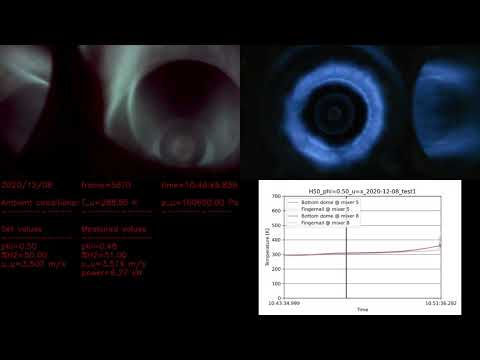

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('ebMpg2rx3QM', width=720, height=480) 

### $H_{2}\%=50$, $\phi=0.60$, test 1

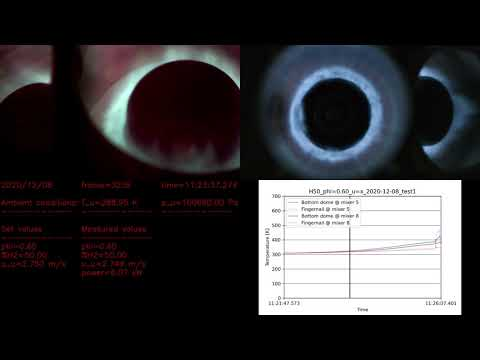

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('DmpKahUNZxo', width=720, height=480) 

### $H_{2}\%=50$, $\phi=0.70$, test 13

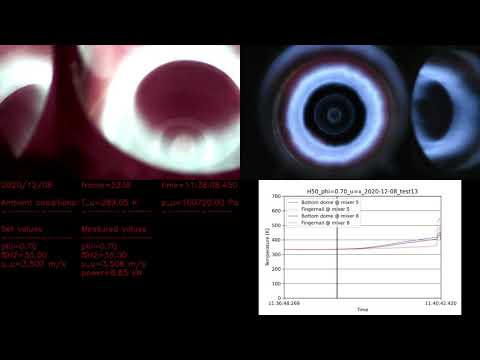

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('cjtjPDJzuAQ', width=720, height=480) 

### $H_{2}\%=50$, $\phi=0.80$, test 1

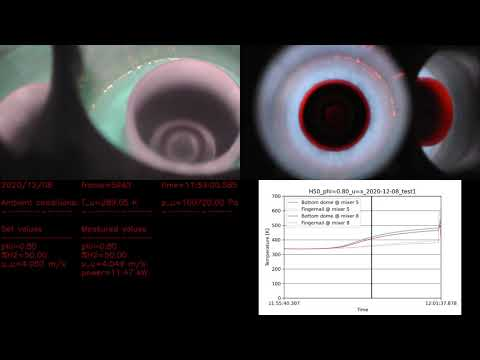

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo('rFcBJMK6avA', width=720, height=480) 

### $H_{2}\%=50$, $\phi=0.90$, test 1

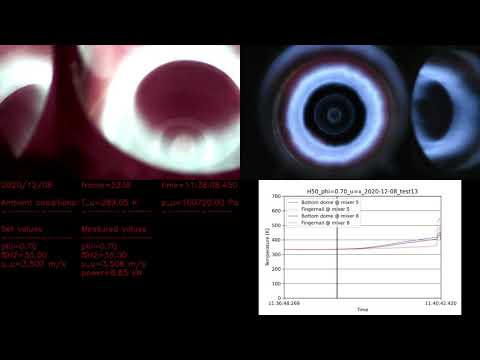

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo('cjtjPDJzuAQ', width=720, height=480) 

### $H_{2}\%=75$, $\phi=0.50$, test 1

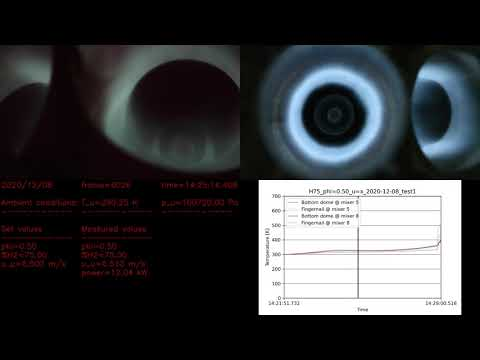

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('zr5H5Ld2F-M', width=720, height=480) 

### $H_{2}\%=75$, $\phi=0.60$, test 4

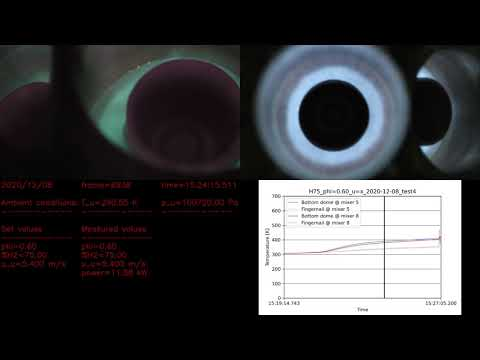

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo('PPPF6aOkk3Y', width=720, height=480)